En este ejemplo se realiza la combinacion de diferentes tablas utilizando las opciones:
-Merge
-Join
-Concatenate
-Compare
se utlizan las tablas relacionales del ejemplo de SQL

In [2]:
# importamos las librerias que se utilizarán

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargamos las tablas a utilizar

customers = pd.read_csv('../files/customers.csv')
employees = pd.read_csv('../files/employees.csv')
offices = pd.read_csv('../files/offices.csv')
orderDetails = pd.read_csv('../files/orderdetails.csv')
orders = pd.read_csv('../files/orders.csv')
payments = pd.read_csv('../files/payments.csv')
productLines = pd.read_csv('../files/productlines.csv')
products = pd.read_csv('../files/products.csv')

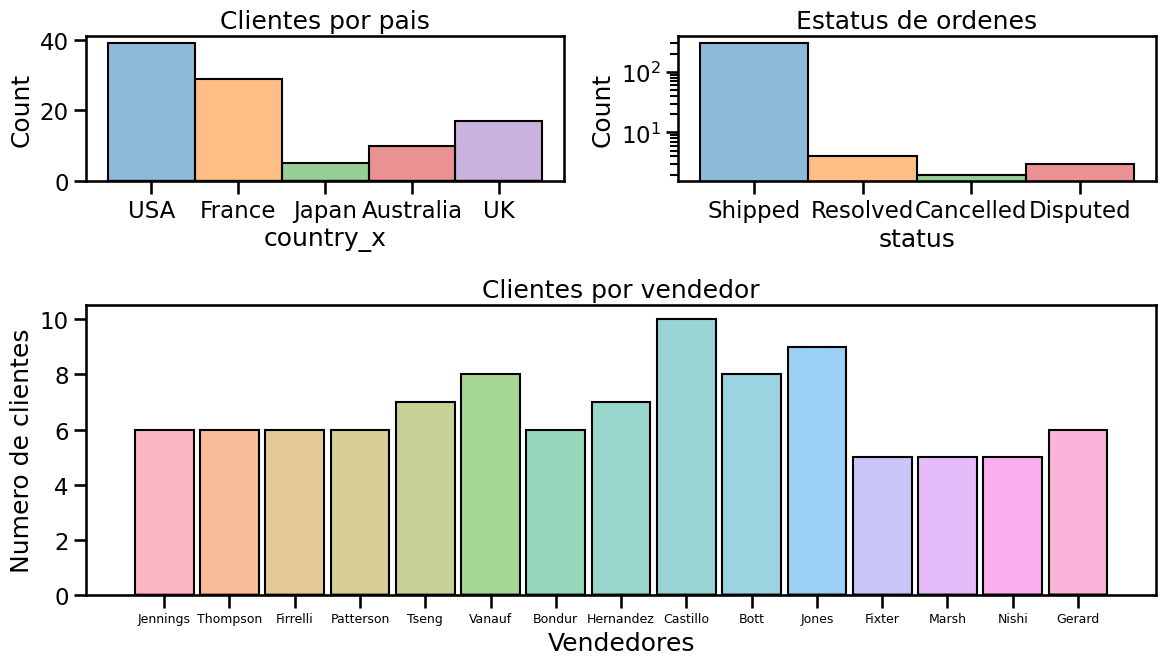

In [4]:
df_empleados_vendedores=employees.merge(customers,how='inner',left_on='employeeNumber',right_on='salesRepEmployeeNumber')
fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2])
sns.color_palette("bright")
sns.set_context("talk")
ax3 = fig.add_subplot(gs[1, :])
sns.histplot(data=df_empleados_vendedores,x='lastName',discrete=True,shrink=.9,ax=ax3,hue='lastName',legend=False)
ax3.set_xlabel('Vendedores')
ax3.set_ylabel('Numero de clientes')
ax3.set_title('Clientes por vendedor')
plt.xticks(fontsize=9)

df_pais_vendedor = offices.merge(df_empleados_vendedores,how='inner',left_on='officeCode',right_on='officeCode')
ax1= fig.add_subplot(gs[0,0])
sns.histplot(data=df_pais_vendedor,x='country_x',ax=ax1,hue='country_x',legend=False)
ax1.set_title('Clientes por pais')

ax2 = fig.add_subplot(gs[0,1])
sns.histplot(data= orders, x='status',ax=ax2,hue='status',legend=False)
plt.yscale('log')
ax2.set_title('Estatus de ordenes')
plt.tight_layout()

In [5]:
df_productos_vendidos=orderDetails.merge(products,how='inner',left_on='productCode',right_on='productCode')
df_ordenes_pagadas = orders.merge(payments, how='inner',left_on='customerNumber',right_on='customerNumber')
df_ventas= df_productos_vendidos.merge(df_ordenes_pagadas,how='inner',left_on='orderNumber',right_on='orderNumber')

Text(0.5, 1.0, 'Numero de ventas por linea de productos')

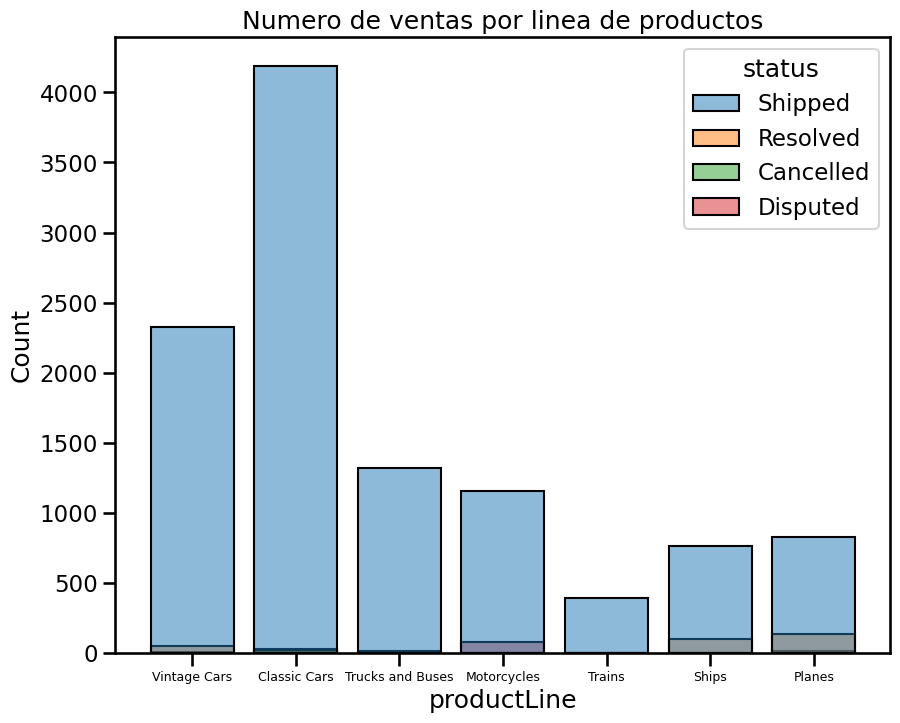

In [6]:

fig2=plt.figure(figsize=(10,8))
ax1=fig2.add_subplot(1,1,1)
sns.histplot(df_ventas,x='productLine',hue='status',discrete=True,shrink=0.8 ,ax=ax1)
plt.xticks(fontsize=9)
ax1.set_title('Numero de ventas por linea de productos')

([<matplotlib.patches.Wedge at 0x111090fde10>,
 [Text(-0.9603261568162827, -0.5364454049896116, 'Classic Cars'),
  Text(0.478176319607647, -0.9906298033909972, 'Motorcycles'),
  Text(0.9178117389208874, -0.6063180781561911, 'Planes'),
  Text(1.0921708094819342, -0.13100733916684534, 'Ships'),
  Text(1.071119029525481, 0.25040771671095075, 'Trains'),
  Text(0.8128252539227516, 0.741157949822718, 'Trucks and Buses'),
  Text(-0.23599996331390902, 1.0743854137672542, 'Vintage Cars')],
 [Text(-0.523814267354336, -0.2926065845397881, '38.4%'),
  Text(0.2608234470587165, -0.540343529122362, '9.7%'),
  Text(0.5006245848659385, -0.33071895172155874, '7.4%'),
  Text(0.5957295324446913, -0.07145854863646109, '7.3%'),
  Text(0.5842467433775351, 0.1365860272968822, '3.8%'),
  Text(0.4433592294124099, 0.4042679726305734, '12.5%'),
  Text(-0.12872725271667765, 0.5860284075094112, '20.9%')])

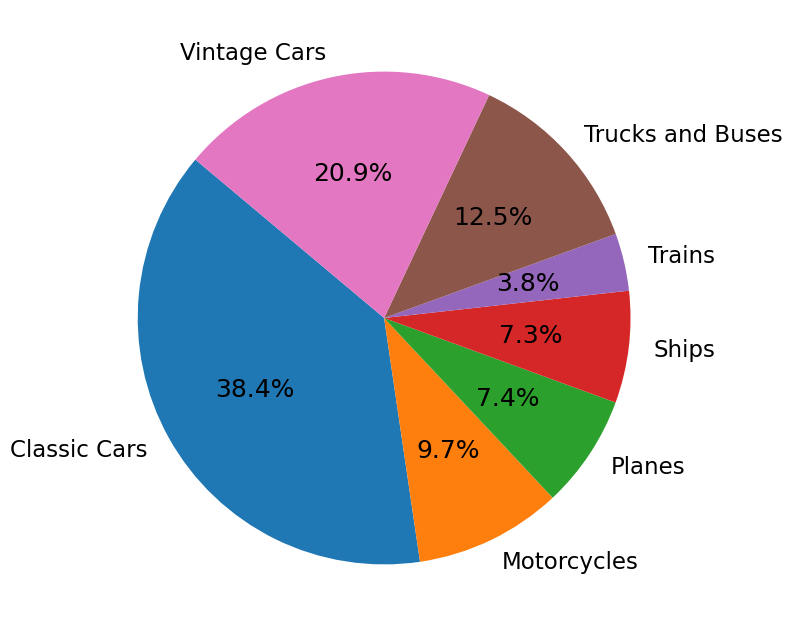

In [7]:
fig3=plt.figure(figsize=(8,8))
ventas_lineaProd= df_ventas.groupby('productLine')['amount'].sum()
plt.pie(ventas_lineaProd,labels=ventas_lineaProd.index, autopct='%1.1f%%', startangle=140)

In [8]:
df_ventas['paymentDate']=pd.to_datetime(df_ventas['paymentDate'],format='%Y-%m-%d')
df_ventas['mes']=df_ventas['paymentDate'].dt.month
df_ventas['anio']=df_ventas['paymentDate'].dt.year
ventas_x_mes=df_ventas.groupby([df_ventas['anio'],df_ventas['mes']])['amount'].sum()

In [25]:
df_resultado = ventas_x_mes.reset_index()
df_resultado.columns = ['año', 'mes', 'ventas_T']
df_resultado['crecimiento']=df_resultado['ventas_T'].pct_change()*100
df_resultado['año']=df_resultado['año'].astype(str)

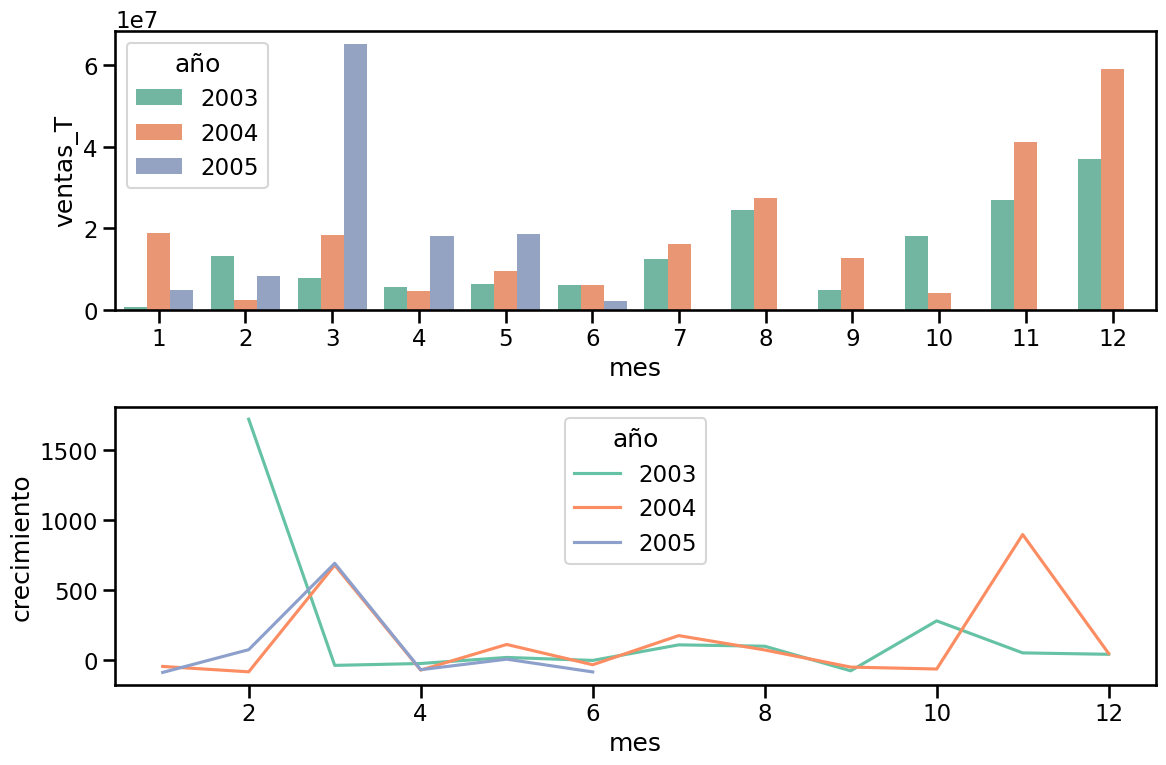

In [26]:
fig4=plt.figure(figsize=(12,8))
gs1=gridspec.GridSpec(2,1)
ax4= fig4.add_subplot(gs1[0])
ax5=fig4.add_subplot(gs1[1])
sns.barplot(data= df_resultado,x='mes',y='ventas_T',hue='año' ,palette="Set2",ax=ax4)
sns.lineplot(df_resultado,x='mes',y='crecimiento',hue='año', markers='o',ax=ax5,palette="Set2")
plt.tight_layout()